# Predicting Apple Stock Potential from Apple Leaks

Idea:
Train classifier to predict stock trend for the next n days after a week, n tbd.
Input:
- Keywords
- leak sentiment -> Zero shot, manual validation
- financial trend
- stock price of previous day / Average Stock prive of previous Lag

Train a second model that also gets the leaker and its accuracy as input?

## Introduction

## Approach

## The Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

leaks_df: pd.DataFrame = pd.read_csv('./datasets/apple_leaks/Each_Leak/Each_Leak.csv')
leaks_df

,Name,Accuracy,Link of Leaker Dashboard,Description,Img,Status,Leak,Leak Link
0,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,No 11-inch Mini-LED iPad Pro in 2022,NaN
1,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,Studio Display Pro will be Mini-LED,https://appletrack.com/studio-display-pro-with...
2,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,Studio Display Pro coming in June,https://appletrack.com/studio-display-pro-with...
3,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,20-inch iPad/MacBook hybrid coming in 2025,https://appletrack.com/apple-investigating-20-...
4,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,iPhone Fold not coming until at least 2025,https://appletrack.com/no-foldable-iphone-unti...
...,...,...,...,...,...,...,...,...
1072,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,⛔️,4G iPhone 12 will cost ~$800,https://www.businessinsider.com/apple-iphone-1...
1073,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,⛔️,2020 iPhones will be announced in September,https://9to5mac.com/2020/07/13/september-launc...
1074,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,✅,2020 iPhones won’t include EarPods,https://9to5mac.com/2020/06/16/apple-analyst-n...
1075,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,⛔️,2020 iPhones will ship in “early October”,https://9to5mac.com/2020/06/16/apple-analyst-n...


In [2]:
leaks_df.dropna(inplace=True)
leaks_df

,Name,Accuracy,Link of Leaker Dashboard,Description,Img,Status,Leak,Leak Link
1,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,Studio Display Pro will be Mini-LED,https://appletrack.com/studio-display-pro-with...
2,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,Studio Display Pro coming in June,https://appletrack.com/studio-display-pro-with...
3,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,20-inch iPad/MacBook hybrid coming in 2025,https://appletrack.com/apple-investigating-20-...
4,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,iPhone Fold not coming until at least 2025,https://appletrack.com/no-foldable-iphone-unti...
5,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,2022 iMac coming in June 2022,https://appletrack.com/revamped-imac-pro-to-la...
...,...,...,...,...,...,...,...,...
1072,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,⛔️,4G iPhone 12 will cost ~$800,https://www.businessinsider.com/apple-iphone-1...
1073,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,⛔️,2020 iPhones will be announced in September,https://9to5mac.com/2020/07/13/september-launc...
1074,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,✅,2020 iPhones won’t include EarPods,https://9to5mac.com/2020/06/16/apple-analyst-n...
1075,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,⛔️,2020 iPhones will ship in “early October”,https://9to5mac.com/2020/06/16/apple-analyst-n...


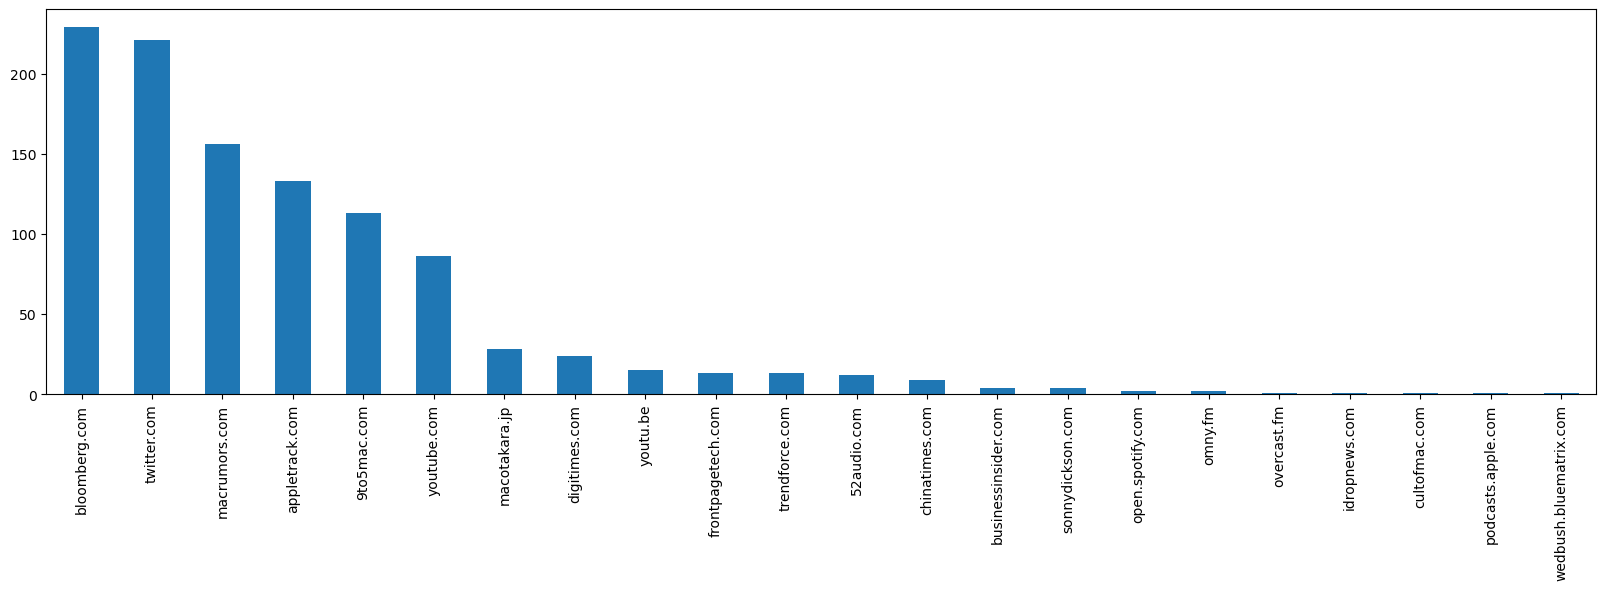

In [3]:
import re
leaks_df["domain"] = leaks_df["Leak Link"].apply(lambda x: re.search(r'(?:https?://|^)([^/]+)', str(x)).group(0).replace("https://", "").replace("www.", "").replace("http://", ""))
leaks_df["domain"].value_counts().plot.bar(figsize=(20,5))
plt.xticks(rotation='vertical')
plt.show()

In [4]:
# Filter all domains which have < 50 occurences
domains_to_keep = leaks_df.domain.value_counts()[leaks_df.domain.value_counts() >= 100]
leaks_df = leaks_df[leaks_df.domain.isin(domains_to_keep.index)]
leaks_df

,Name,Accuracy,Link of Leaker Dashboard,Description,Img,Status,Leak,Leak Link,domain
1,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,Studio Display Pro will be Mini-LED,https://appletrack.com/studio-display-pro-with...,appletrack.com
2,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,Studio Display Pro coming in June,https://appletrack.com/studio-display-pro-with...,appletrack.com
3,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,20-inch iPad/MacBook hybrid coming in 2025,https://appletrack.com/apple-investigating-20-...,appletrack.com
4,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,iPhone Fold not coming until at least 2025,https://appletrack.com/no-foldable-iphone-unti...,appletrack.com
5,🐟 Ross Young,92.9%,https://appletrack.com/ross-young/,With over 25 years of experience in the displa...,https://secure.gravatar.com/avatar/507b884cc2d...,⏳,2022 iMac coming in June 2022,https://appletrack.com/revamped-imac-pro-to-la...,appletrack.com
...,...,...,...,...,...,...,...,...,...
1067,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,✅,"AirTags will be released at April 20, 2021",https://www.macrumors.com/2021/04/19/wedbush-e...,macrumors.com
1068,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,⛔️,"AirPods 3 will be teased at April 20, 2021 event",https://www.macrumors.com/2021/04/19/wedbush-e...,macrumors.com
1073,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,⛔️,2020 iPhones will be announced in September,https://9to5mac.com/2020/07/13/september-launc...,9to5mac.com
1074,🌳 Wedbush Securities,45.4%,https://appletrack.com/wedbush/,"Based out of Los Angeles, Wedbush Securities p...",https://secure.gravatar.com/avatar/507b884cc2d...,✅,2020 iPhones won’t include EarPods,https://9to5mac.com/2020/06/16/apple-analyst-n...,9to5mac.com


In [ ]:
"apple_track": "article:published_time" content="2022-03-10T07"
"twitter": "<time datetime="2022-01-31T18:20:18.000Z">7:20 pm · 31 Jan 2022</time>"
"bloomberg": "<time itemprop="datePublished" datetime="2022-01-30T14:45:12.893Z" data-locale="en">30 January 2022 at 15:45 CET</time>"
"9to5mac": "article:published_time" content="2021-04-05T23:"
"macrumors": "<time datetime="2020-03-19T08:19:54-07:00">Thursday March 19, 2020 8:19 am PDT</time>"

In [24]:
import subprocess
from typing import List, Tuple
from datetime import datetime
import requests

def extract_dates_via_html():

    rgxs = {
        "appletrack.com": r'(?:published_time" content=")(\d{4}-\d{2}-\d{2})',
        "9to5mac.com": r'(?:published_time" content=")(\d{4}-\d{2}-\d{2})',
        "macrumors.com": r'(?:<time datetime=")(\d{4}-\d{2}-\d{2})',
    }

    links = leaks_df[["Leak Link", "domain"]][(leaks_df["domain"] != "twitter.com") & (leaks_df["domain"] != "bloomberg.com")].drop_duplicates()
    res: List[Tuple[str, datetime]] = []
    cnt = 0
    for idx, row in links.iterrows():
        html = requests.get(row["Leak Link"]).content
        match = re.search(rgxs[row["domain"]], str(html)).groups()[0]
        res.append((row["Leak Link"], datetime.strptime(match, '%Y-%m-%d')))
        if cnt == 2:
            break
        cnt += 2
    return pd.DataFrame(res, columns=["url", "datetime"])

def extract_dates_twitter():
    links: List = leaks_df["Leak Link"][leaks_df["domain"] == "twitter.com"].drop_duplicates().tolist()[:2]
    subprocess.run(["python", "scrape_date_from_twitter.py"] + links)
    twitter_dates = pd.read_csv("datasets/scraped_twitter_dates.csv")
    return twitter_dates

def extract_dates_bloomberg():
    links: List = leaks_df["Leak Link"][leaks_df["domain"] == "bloomberg.com"].drop_duplicates().tolist()[2:4]
    subprocess.run(["python", "scrape_data_from_bloomberg.py"] + links)
    bloomberg_dates = pd.read_csv("datasets/scraped_bloomberg_dates.csv")
    return bloomberg_dates

extracted_html = extract_dates_via_html()
extracted_twitter = extract_dates_twitter()
extracted_bloomberg = extract_dates_bloomberg()
all_dates = pd.concat([
    extracted_html,
    extracted_twitter,
    extracted_bloomberg
])
all_dates

2it [01:04, 32.50s/it]
2it [01:14, 37.25s/it]


,url,datetime
0,https://appletrack.com/studio-display-pro-with...,2022-03-10 00:00:00
1,https://appletrack.com/apple-investigating-20-...,2022-02-21 00:00:00
0,https://twitter.com/DSCCRoss/status/1488215580...,2022-01-31 18:20:18+00:00
1,https://twitter.com/DSCCRoss/status/1481306555...,2022-01-12 16:46:18+00:00
0,https://www.bloomberg.com/news/newsletters/202...,2022-01-23
1,https://www.bloomberg.com/news/articles/2022-0...,2022-01-14


In [111]:
re.search(r'(?:published_time" content=")(\d{4}-\d{2}-\d{2})', str(requests.get("https://9to5mac.com/2021/07/20/new-ipad-mini-exclusive-a15-processor-usb-c/").content))

<re.Match object; span=(2751, 2786), match='published_time" content="2021-07-20'>

In [44]:
import requests
from bs4 import BeautifulSoup
import re

soup = BeautifulSoup(requests.get("https://appletrack.com/studio-display-pro-with-mini-led-rumored-to-release-at-wwdc-2022/").content, 'html.parser')
time_tag = soup.find('published_time')

if time_tag and 'datetime' in time_tag.attrs:
    print(time_tag['datetime'])
else:
    print("Publishing date not found")

print(re.search(r'(.){10}(?:published|created)(.+)', str(requests.get("https://appletrack.com/studio-display-pro-with-mini-led-rumored-to-release-at-wwdc-2022/").content)))
re.search(r'published', str(requests.get("https://appletrack.com/studio-display-pro-with-mini-led-rumored-to-release-at-wwdc-2022/").content))

Publishing date not found
<re.Match object; span=(11007, 115836), match='="article:published_time" content="2022-03-10T07:>


<re.Match object; span=(11017, 11026), match='published'>

In [42]:
requests.get("https://www.youtube.com/watch?v=oBJm1_Ctxg0").headers

{'Content-Type': 'text/html; charset=utf-8', 'X-Content-Type-Options': 'nosniff', 'Cache-Control': 'no-cache, no-store, max-age=0, must-revalidate', 'Pragma': 'no-cache', 'Expires': 'Mon, 01 Jan 1990 00:00:00 GMT', 'Date': 'Thu, 15 Jun 2023 13:41:15 GMT', 'Strict-Transport-Security': 'max-age=31536000', 'X-Frame-Options': 'SAMEORIGIN', 'Cross-Origin-Opener-Policy-Report-Only': 'same-origin-allow-popups; report-to="youtube_main"', 'Permissions-Policy': 'ch-ua-arch=*, ch-ua-bitness=*, ch-ua-full-version=*, ch-ua-full-version-list=*, ch-ua-model=*, ch-ua-wow64=*, ch-ua-form-factor=*, ch-ua-platform=*, ch-ua-platform-version=*', 'Origin-Trial': 'AvC9UlR6RDk2crliDsFl66RWLnTbHrDbp+DiY6AYz/PNQ4G4tdUTjrHYr2sghbkhGQAVxb7jaPTHpEVBz0uzQwkAAAB4eyJvcmlnaW4iOiJodHRwczovL3lvdXR1YmUuY29tOjQ0MyIsImZlYXR1cmUiOiJXZWJWaWV3WFJlcXVlc3RlZFdpdGhEZXByZWNhdGlvbiIsImV4cGlyeSI6MTcxOTUzMjc5OSwiaXNTdWJkb21haW4iOnRydWV9', 'Report-To': '{"group":"youtube_main","max_age":2592000,"endpoints":[{"url":"https://csp.withgo

In [43]:
requests.get(leaks_df['Leak Link'].unique()[6]).content

b'<!DOCTYPE html>\n<html dir="ltr" lang="en">\n<head>\n<meta charset="utf-8" />\n<meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=0,viewport-fit=cover" /><link rel="preconnect" href="//abs.twimg.com" /><link rel="dns-prefetch" href="//abs.twimg.com" /><link rel="preconnect" href="//api.twitter.com" /><link rel="dns-prefetch" href="//api.twitter.com" /><link rel="preconnect" href="//pbs.twimg.com" /><link rel="dns-prefetch" href="//pbs.twimg.com" /><link rel="preconnect" href="//t.co" /><link rel="dns-prefetch" href="//t.co" /><link rel="preconnect" href="//video.twimg.com" /><link rel="dns-prefetch" href="//video.twimg.com" /><link nonce="NjZkNjVhN2MtNTc0Yy00ZjVjLWJjZmEtNjM4ZWU3ZWM3ZGFk" rel="preload" as="script" crossorigin="anonymous" href="https://abs.twimg.com/responsive-web/client-web-legacy/polyfills.d5242a4a.js" /><link nonce="NjZkNjVhN2MtNTc0Yy00ZjVjLWJjZmEtNjM4ZWU3ZWM3ZGFk" rel="preload" as="script" crossorigin="anonymous" href="h